## Ramsey Model in Continuous Time

In [2]:
import numpy as np

In [525]:
# 1. Set parameters

γ = 2.0
ρ = 0.05
α = 1/3
δ = 0.05

def kss():
    return ((δ+ρ)/α)**(1/(α-1))
kss = kss()

kmax = 2*kss
kmin = 0.01*kss
N = 400
maxit=20000
crit = 10**-6

In [526]:
# 2. Create Grid for K
k = np.linspace(kmin, kmax, N)
dk = (kmax-kmin)/(N-1)

dV = np.zeros(N)
dVb = np.zeros(N)
dVf = np.zeros(N)
c = np.zeros(N)

V0 = (((k**α)**(1-γ))/(1-γ))/ρ   # Initial guess for v is steady state v
v = V0


# Construct matrix to get fast the finite differences in v vector
# D = np.zeros((N, N))

# for i in range(1,N-1):
#     for j in range(0,N):
#         if i-j == 1:
#             D[i,j] = -0.5/(dk)
#         if i-j == -1:
#             D[i,j] = 0.5/(dk)

# D[0,0], D[0,1] = -1/dk, 1/dk
# D[-1,-2], D[-1,-1] = -1/dk, 1/dk 

In [527]:
# 3. Solve!
from time import time
dist = []

start = time()
for i in range(0,maxit):
    V = v
    
    # forward difference
    dVf[0:N-1] = (V[1:N]-V[0:N-1])/dk
    dVf[N-1] = 0 #will never be used
    # backward difference
    dVb[1:N] = (V[1:N]-V[0:N-1])/dk
    dVb[0] = 0 #will never be used
    
    I_concave = dVb > dVf  #indicator whether value function is concave (problems arise if this is not the case)
    
    #consumption and savings with forward difference
    cf = dVf**(-1/γ)
    muf = k**α - δ*k - cf
    #consumption and savings with backward difference
    cb = dVb**(-1/γ)
    mub = k**α - δ*k - cb
    #consumption and derivative of value function at steady state
    c0 = k**α - δ*k 
    dV0 = c0**(-γ)
    
    # dV_upwind makes a choice of forward or backward differences based on
    # the sign of the drift    
    If = muf > 0 #below steady state
    Ib = mub < 0 #above steady state
    I0 = (1-If-Ib) #at steady state
    #make sure the right approximations are used at the boundaries
    Ib[0] = 0
    If[0] = 1
    Ib[N-1] = 1
    If[N-1] = 0
    dV_Upwind = dVf*If + dVb*Ib + dV0*I0 #important to include third term
    
    c = dV_Upwind**(-1/γ)
    Vchange = c**(1-γ)/(1-γ) + dV_Upwind*(k**α - δ*k - c) - ρ*V
        
    ## This is the update
    # the following CFL condition seems to work well in practice
    Delta = .9*dk/max(k**α - δ*k)
    v = v + Delta*Vchange
    
    dist.append( max(abs(Vchange)) )
    if dist[i] < crit:
        print('Value Function Converged, Iteration = %5.0f' % i)
        break
end = time()

print('It took %1.2f seconds' % (end-start))

/Users/joaobduarte/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in power
/Users/joaobduarte/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in power


Value Function Converged, Iteration = 14416
It took 3.93 seconds


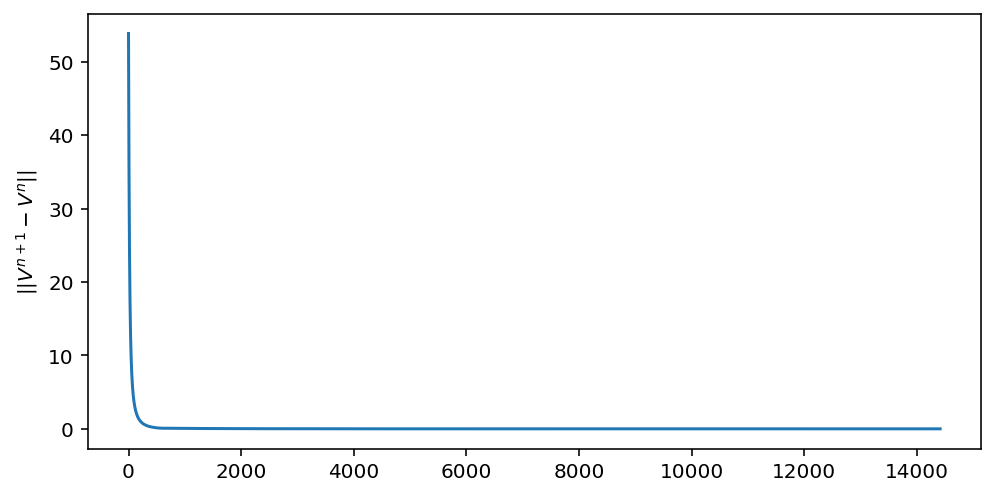

In [528]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'


fig, ax = plt.subplots(figsize = (8, 4))
ax.plot(dist)
ax.set_ylabel(r'$||V^{n+1} - V^n||$')
plt.show()

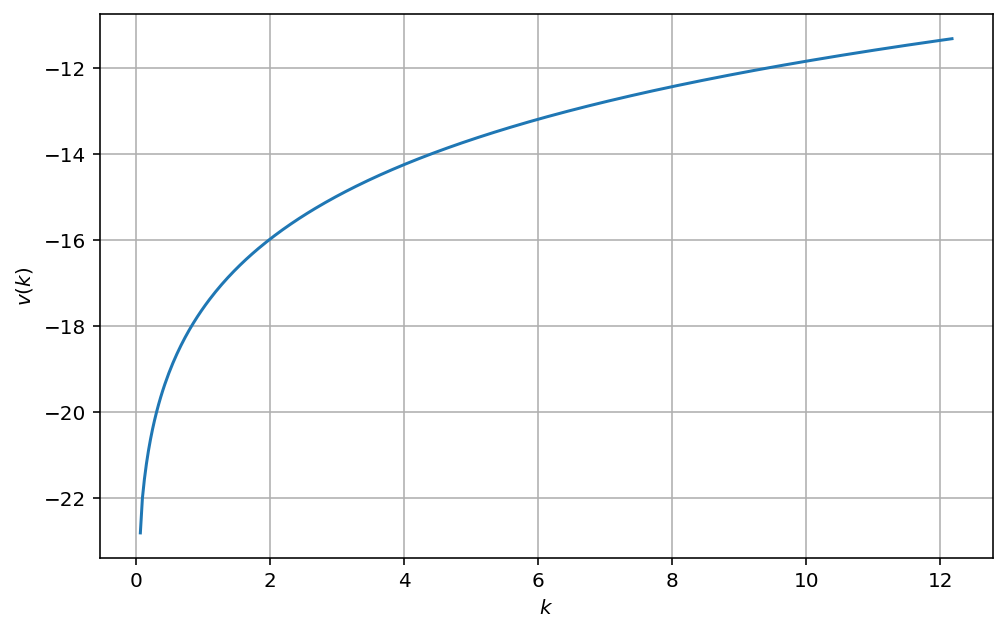

In [529]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(k, v)
ax.set_ylabel(r'$v(k)$')
ax.set_xlabel(r'$k$')
ax.grid()
plt.show()

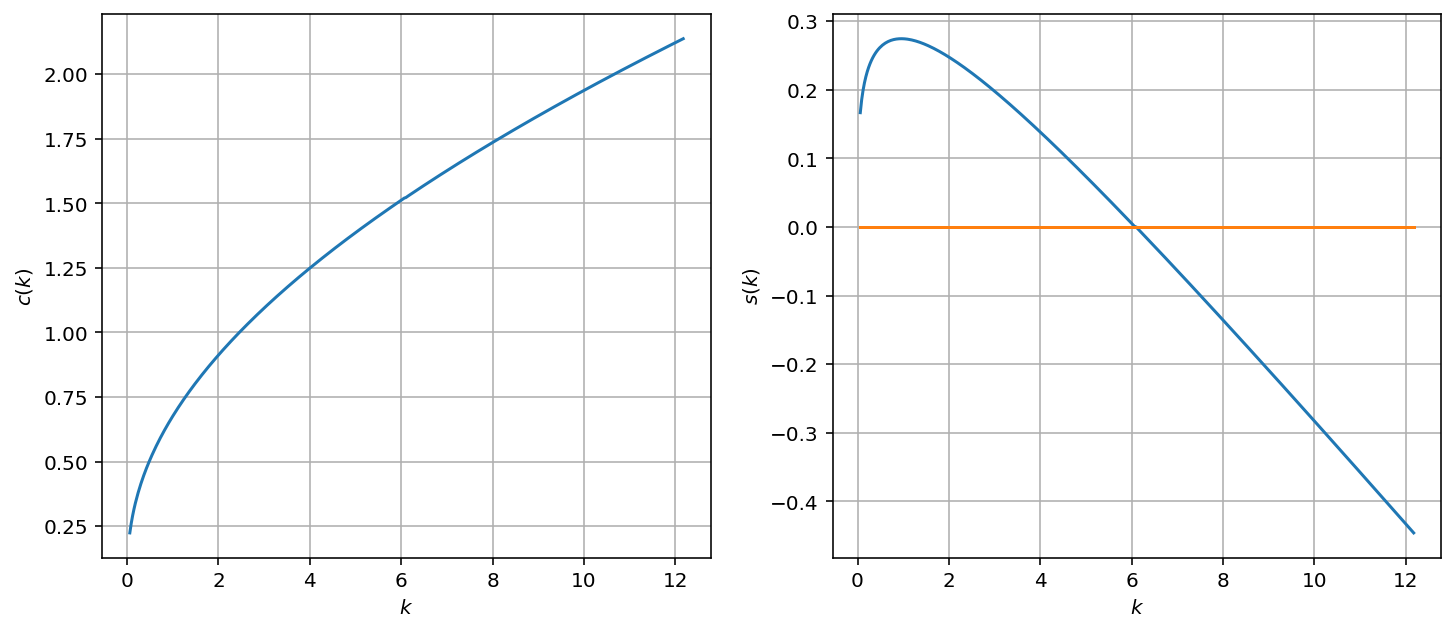

In [530]:
kdot = k**α - δ*k - c
fig, ax = plt.subplots(1,2,figsize = (12, 5))
ax[0].plot(k, c)
ax[0].set_ylabel(r'$c(k)$')
ax[0].set_xlabel(r'$k$')
ax[0].grid()

ax[1].plot(k, kdot)
ax[1].plot(k, np.zeros(N))
ax[1].set_ylabel(r'$s(k)$')
ax[1].set_xlabel(r'$k$')
ax[1].grid()
plt.show()